In [489]:
# This is dev; solid code goes in Metrics Generation.ipynb

In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
root = '../export_contours/contours_20210601/'
pops = ['htert', 'hgps', 'HUVEC', 'Parent', 'RS']

In [28]:
all_fnames = {}
for pop in pops:
    fnames = glob.glob(os.path.join(root, pop, 'contours_*P00*/*Nuc*.txt'))
    print(pop, len(fnames))
    all_fnames[pop] = fnames

htert 70
hgps 70
HUVEC 70
Parent 70
RS 50


In [29]:
all_fnames['htert']

['../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z08.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z09.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z07.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z06.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z04.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z10.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z05.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z01.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z02.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_1_real/C_Nuc_Z03.txt',
 '../export_contours/contours_20210601/htert/contours_htert_P00_6_real/C_Nuc_Z08.txt',
 '../export_contours/contours_20210601/hter

In [93]:
def fetch_pts(fname, dims=2):
    pts = open(fname,'r').readlines()
    pts = [_.strip().split(',') for _ in pts[5:]]
    return np.array([_[2:2+dims] for _ in pts],dtype=float)
        
res = fetch_pts(all_fnames['hgps'][0]); print(res)

[[-4.95   0.213]
 [-5.048 -1.245]
 [-2.985 -1.517]
 [-2.73  -2.753]
 [-1.867 -3.878]
 [-0.482 -4.714]
 [ 1.411 -5.292]
 [ 3.783 -5.244]
 [ 4.08  -2.789]
 [ 4.977 -1.171]
 [ 3.614  0.569]
 [ 1.616  1.2  ]
 [ 0.649  1.401]
 [ 0.117  1.612]
 [-0.36   1.831]
 [-0.935  2.218]
 [-1.914  2.78 ]
 [-3.     2.605]
 [-3.561  1.708]
 [-3.901  0.722]]


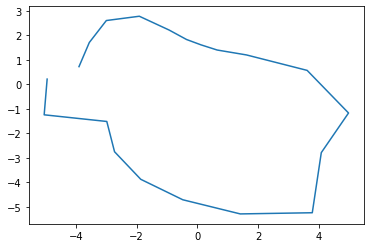

In [94]:
plt.plot(res.T[0], res.T[1])

In [95]:
import sys
sys.executable

'/Users/asears/opt/anaconda3/bin/python'

In [96]:
!/Users/asears/opt/anaconda3/bin/python -m pip install pyefd

In [97]:
from pyefd import elliptic_fourier_descriptors


In [98]:
coeffs = elliptic_fourier_descriptors(res, order=30)

In [99]:
coeffs

array([[-4.21505857e+00, -1.05872097e+00,  2.14842113e+00,
        -2.87582555e+00],
       [-1.31799087e-01,  2.64831101e-01, -1.66368989e-02,
         2.02291663e-01],
       [-1.08642417e-01,  5.19335851e-02, -5.71441823e-02,
        -3.48670054e-01],
       [-2.38345935e-01, -6.54178201e-02, -1.80900750e-01,
        -1.21008800e-01],
       [ 2.37788171e-02,  4.55473789e-03, -1.49481930e-01,
        -1.28428736e-01],
       [-5.19329450e-02, -1.01841637e-01,  1.69042911e-02,
        -1.96101278e-02],
       [ 9.51992118e-02, -2.93215456e-03,  8.35998235e-03,
        -3.71476277e-02],
       [ 2.15618113e-02, -3.94599278e-02,  5.60969926e-02,
         1.39083442e-02],
       [ 4.51822851e-02,  2.03949241e-02,  1.90436480e-02,
         1.58016285e-02],
       [ 1.55591712e-02,  2.42454724e-03,  2.35176385e-02,
         2.21161763e-03],
       [-1.57928863e-02,  6.30036115e-03, -7.77826327e-03,
         2.77417470e-02],
       [ 6.79815374e-03,  1.60229035e-02,  4.93788740e-03,
      

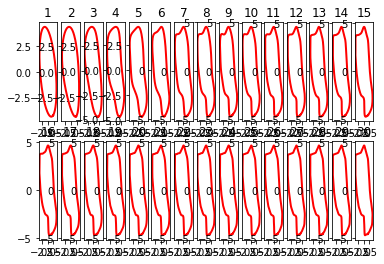

In [100]:
pyefd.plot_efd(coeffs, locus=(0.0, 0.0), image=None, contour=None, n=300)

In [101]:
dc = pyefd.calculate_dc_coefficients(res)

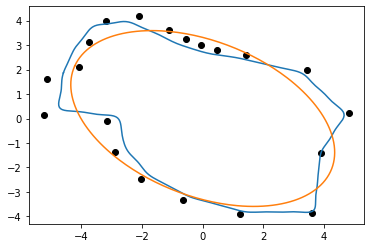

In [111]:
recd = pyefd.reconstruct_contour(coeffs, locus=(0, 0), num_points=300)
plt.plot(recd.T[0], recd.T[1])
plt.scatter(res.T[0]-dc[0], res.T[1]-dc[1], color='k')

rec0 = pyefd.reconstruct_contour(coeffs[:1], locus=(0, 0), num_points=300)
plt.plot(rec0.T[0], rec0.T[1])

In [110]:
coeffs[:1]

array([[-4.21505857, -1.05872097,  2.14842113, -2.87582555]])

In [104]:
coeffs[0]

array([-4.21505857, -1.05872097,  2.14842113, -2.87582555])

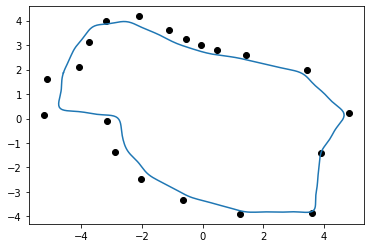

In [107]:
recd = pyefd.reconstruct_contour(coeffs, locus=(0, 0), num_points=300)
plt.plot(recd.T[0], recd.T[1])
plt.scatter(res.T[0]-dc[0], res.T[1]-dc[1], color='k')

In [113]:
np.sqrt(coeffs[:,0]**2+coeffs[:,1]**2), 

array([4.34598767e+00, 2.95814995e-01, 1.20417075e-01, 2.47160426e-01,
       2.42111086e-02, 1.14318632e-01, 9.52443566e-02, 4.49666277e-02,
       4.95720871e-02, 1.57469437e-02, 1.70032294e-02, 1.74054110e-02,
       2.06304194e-02, 1.22197051e-02, 2.92182079e-03, 9.08045191e-03,
       1.73611896e-02, 5.20643808e-03, 9.00134299e-03, 9.60317805e-03,
       4.76832626e-03, 7.15461466e-03, 7.24778411e-03, 6.72991827e-04,
       7.21853719e-03, 4.47309545e-03, 2.74358445e-03, 2.99518242e-03,
       9.60581455e-04, 2.66893960e-03])

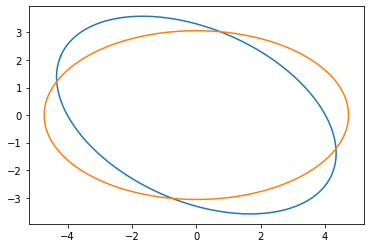

In [121]:
# it's a simple as squaring the appropriate coefficients
coeffs0_old = [-4.21505857e+00, -1.05872097e+00,  2.14842113e+00,
        -2.87582555e+00]
coeffs0_new = np.array([[np.sqrt(coeffs0_old[0]**2+coeffs0_old[2]**2),0,0, np.sqrt(coeffs0_old[1]**2+coeffs0_old[3]**2)]])

rec0 = pyefd.reconstruct_contour(coeffs[:1], locus=(0, 0), num_points=300)
plt.plot(rec0.T[0], rec0.T[1])
rec1 = pyefd.reconstruct_contour(coeffs0_new, locus=(0, 0), num_points=300)
plt.plot(rec1.T[0], rec1.T[1])
# ^ These ellipses have same axes sizes.

In [122]:
coeffs0_new

array([[4.73100751, 0.        , 0.        , 3.06451671]])

[-5.12468004  1.60931688]


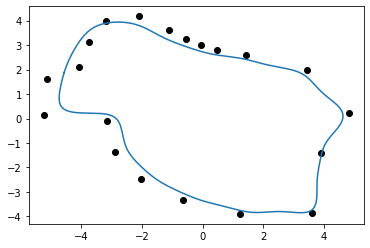

level 0 3.8230050943484346
[-3.24716864  0.52128358]


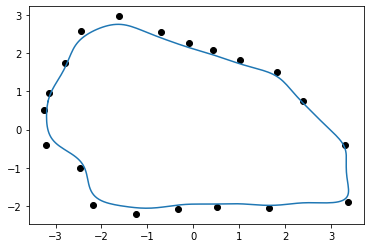

level 1 4.792682859092449
[-7.25629796  1.55564561]


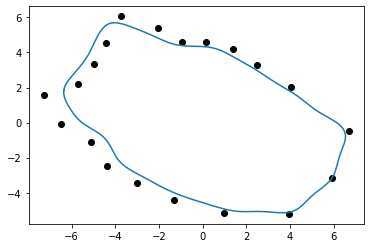

level 2 5.77814997366508
[-7.63476793  1.21907678]


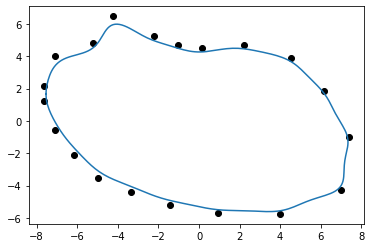

level 3 5.623533453273073
[-7.55759992  1.04634452]


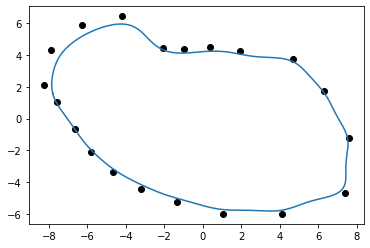

level 4 5.2820716729136326
[-1.43601812 -0.04530148]


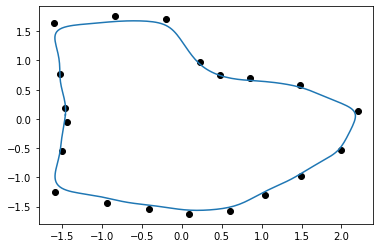

level 5 3.914664805100166
[-7.67302235  1.17355518]


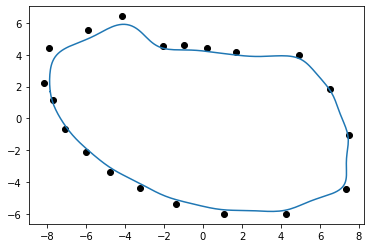

level 6 5.3774233018227875
[-5.51941992  1.61322511]


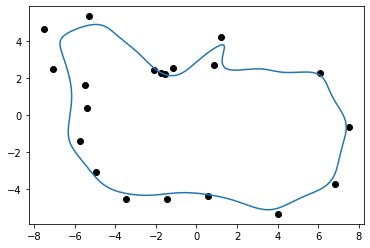

level 7 2.2718124052509308
[-7.19940969  1.56749509]


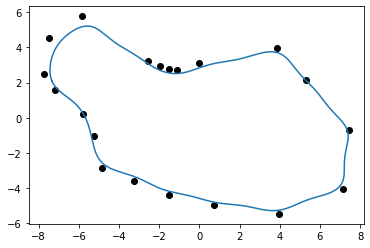

level 8 3.274425362017853
[-7.48082988  1.25388842]


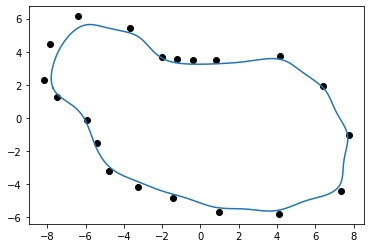

level 9 4.247261664867254
[-5.51721343 -0.07369715]


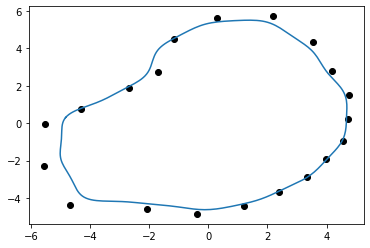

level 10 5.528308412375859
[-3.52773862  0.14565172]


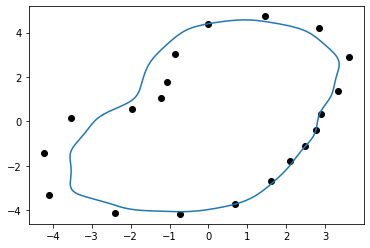

level 11 5.963371814606355
[-5.2174629  -0.03601882]


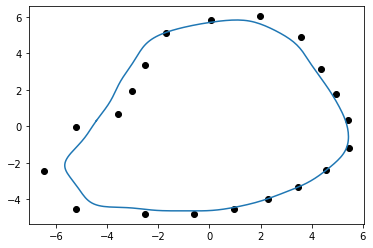

level 12 6.10035553277911
[-4.83745714  0.19037107]


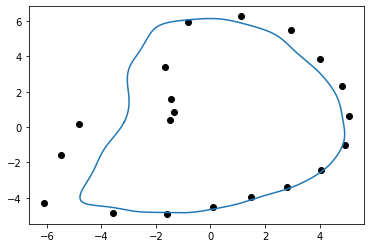

level 13 4.3892029496995635
[-3.78050654  0.02366303]


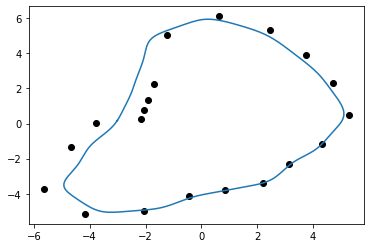

level 14 4.066302493689325
[-1.50958539 -0.12192992]


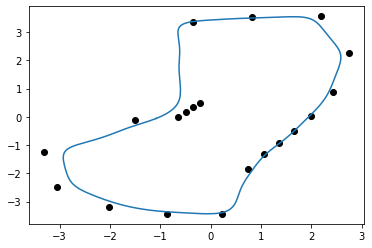

level 15 3.3588180034467854
[-3.72987737  0.1235525 ]


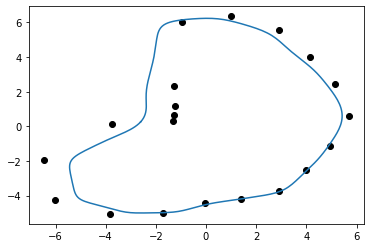

level 16 3.5155894176038798
[-4.08240726 -0.49013627]


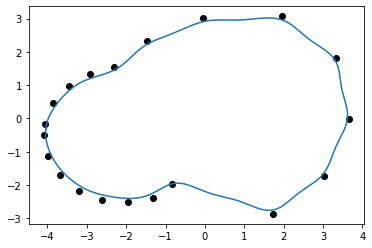

level 17 4.790148107252417
[-2.12181154  0.16717988]


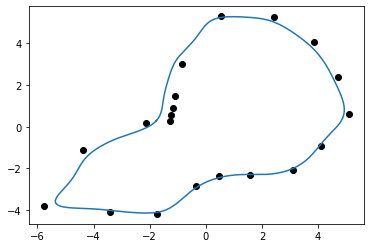

level 18 2.918546502575986
[-3.00044112  0.11586772]


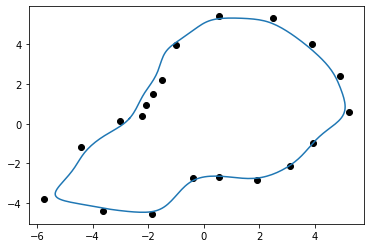

level 19 3.3408608216835547


In [462]:
def efc_ratio(contour, order, doPlot, return_axes=True):
    coeffs = elliptic_fourier_descriptors(contour, order=order)
    semiaxes = np.array([np.sqrt(coeffs[:,0]**2+coeffs[:,2]**2), np.sqrt(coeffs[:,1]**2+coeffs[:,3]**2)])
    efcr = 2*semiaxes[0][0]+2*semiaxes[1][0]+2
    efcr /= 2*np.sum(semiaxes[:,1:])
    
    if doPlot:
        dc = pyefd.calculate_dc_coefficients(contour)
        print(contour[0]-dc)

        recd = pyefd.reconstruct_contour(coeffs, locus=(0, 0), num_points=300)
        plt.plot(recd.T[0], recd.T[1])
        plt.scatter(contour.T[0]-dc[0], contour.T[1]-dc[1], color='k')
        plt.show()
        
#     print(np.array(semiaxes))
    if return_axes:
        return efcr, semiaxes
    else:
        return efcr
#     pass


for _ in range(20):
    res = fetch_pts(all_fnames['hgps'][_]); # print(res)
    print('level %d' % _, efc_ratio(res, order=15, doPlot=True)[0])


# Solidity + Circularity

In [156]:
# area / convex area -- these should really be done on max projection image masks. Do them later.

# Lateral EFC

In [157]:
# Demonstrate constant theta lateral slices

In [163]:
fnames = list(sorted(all_fnames['htert'][0:10]))

In [263]:
all_pts = []
for f in fnames:
    r = fetch_pts(f, dims=3)
    all_pts.append(r)
    
all_pts = np.array(all_pts); print(all_pts.shape)

(70, 36, 3)


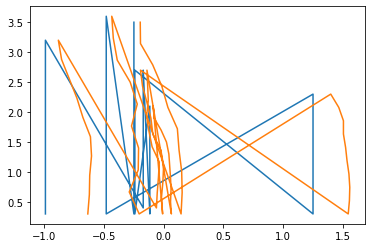

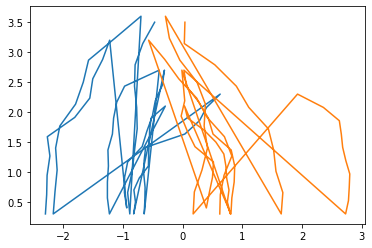

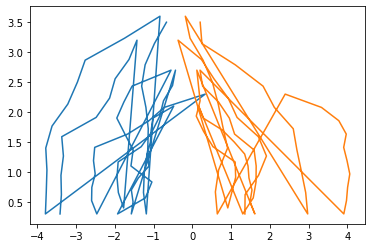

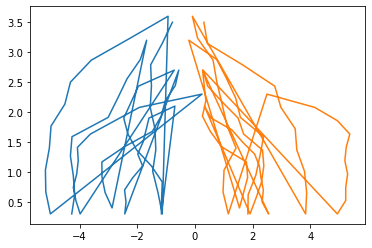

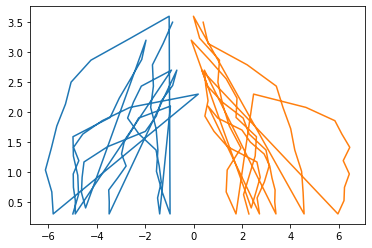

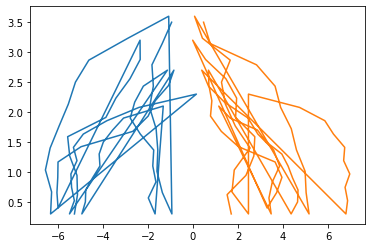

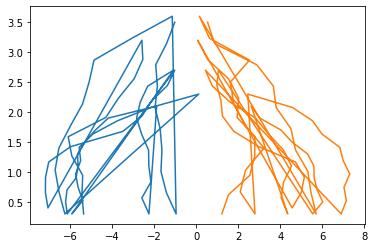

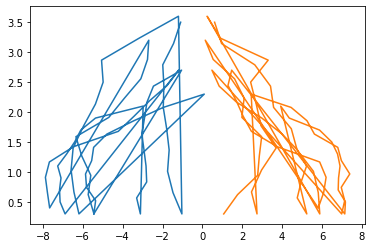

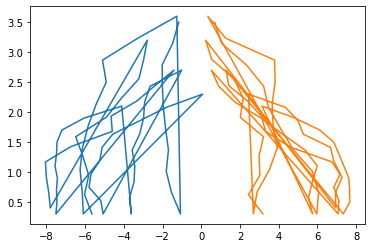

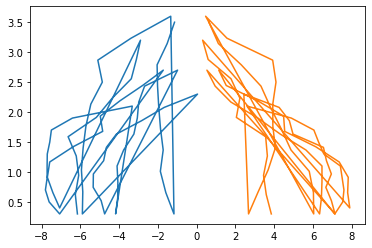

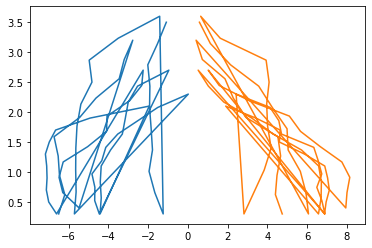

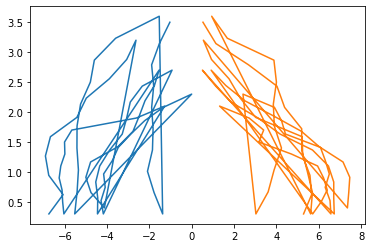

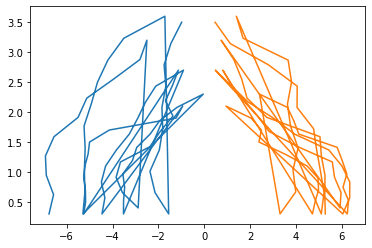

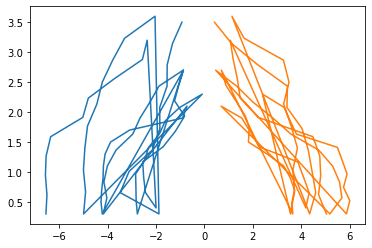

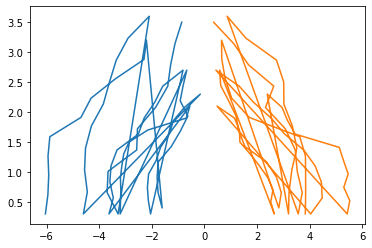

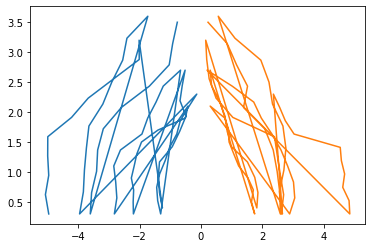

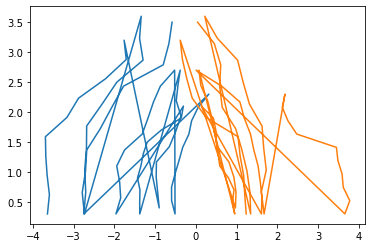

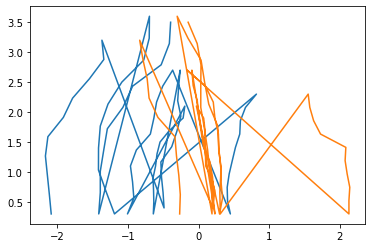

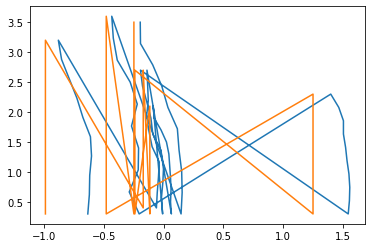

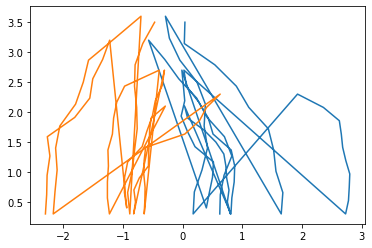

In [264]:
offset = 18
for pt in range(20):
    x0 = all_pts[:,pt,0]
    y0 = all_pts[:,pt,1]
    z0 = all_pts[:,pt,2]
    
    x1 = all_pts[:,pt-offset,0]
    y1 = all_pts[:,pt-offset,1]
    z1 = all_pts[:,pt-offset,2]

#     x1 = (all_pts[:,pt-offset,0] + all_pts[:,pt-offset-1,0])/2.0
#     y1 = (all_pts[:,pt-offset,1] + all_pts[:,pt-offset-1,1])/2.0
#     z1 = (all_pts[:,pt-offset,2] + all_pts[:,pt-offset-1,2])/2.0

    
    plt.plot(y0,z0)
    plt.plot(list(reversed(y1)),list(reversed(z1)))
    plt.show()

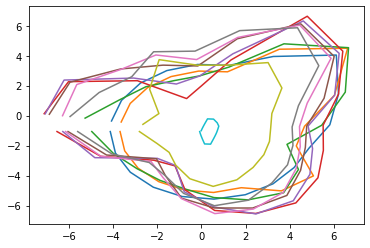

In [194]:
lev = 0
for lev in range(10):
    
    plt.plot(all_pts[lev,:,0],all_pts[lev,:,1])
#     plt.show()

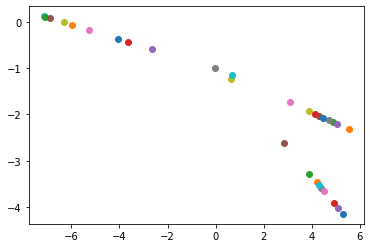

In [204]:
lev = 0
offset = 11
for lev in range(10):
    
    plt.scatter(all_pts[lev,pt,0],all_pts[lev,pt,1])
    plt.scatter(all_pts[lev,pt-offset,0],all_pts[lev,pt-offset,1])
    plt.scatter(all_pts[lev,pt-offset+1,0],all_pts[lev,pt-offset+1,1])

    #     plt.show()
    
# With 20 points, we don't quite get the ability to look at 180deg shift. Bummer.

# File verification

In [209]:
files1 = list(sorted(glob.glob('../export_contours/gtest_hgps_P00_1/*Z*.txt'))); print(len(files1), files1[0])
files2 = list(sorted(glob.glob('../export_contours/contours_hgps1_P00_1/*Z*.txt'))); print(len(files2), files2[0])

20 ../export_contours/gtest_hgps_P00_1/C_Cyto_Z01.txt
20 ../export_contours/contours_hgps1_P00_1/C_Cyto_Z01.txt


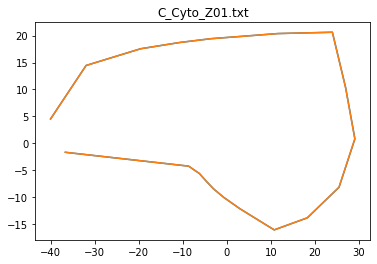

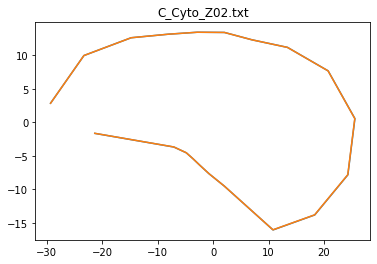

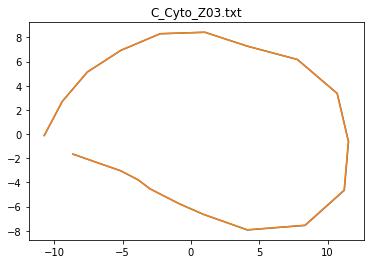

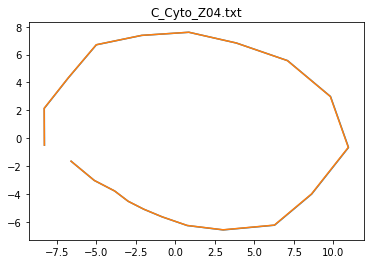

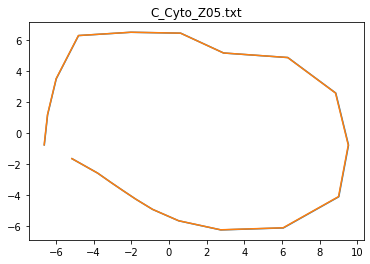

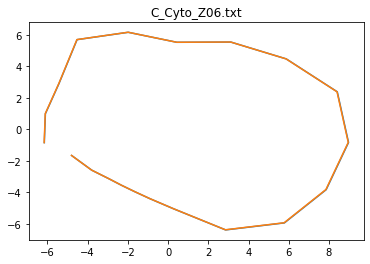

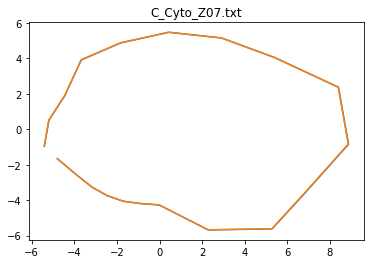

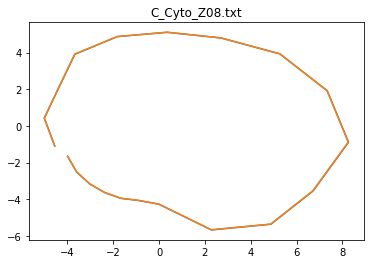

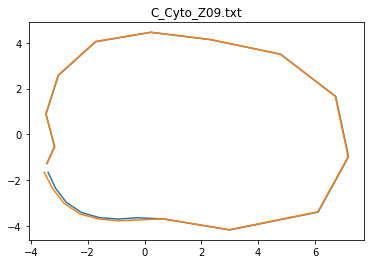

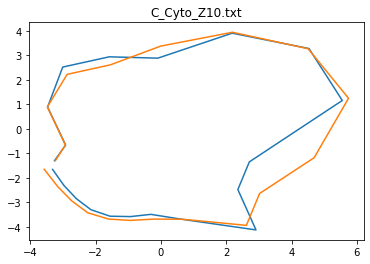

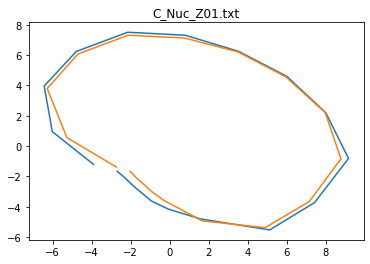

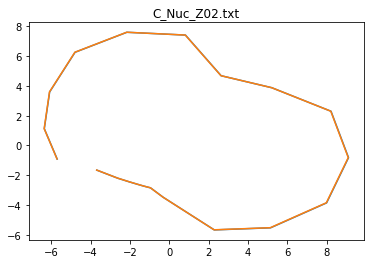

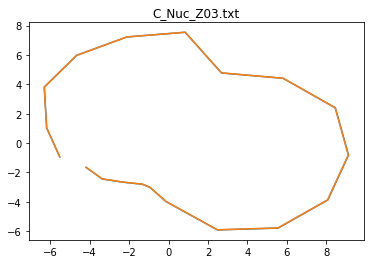

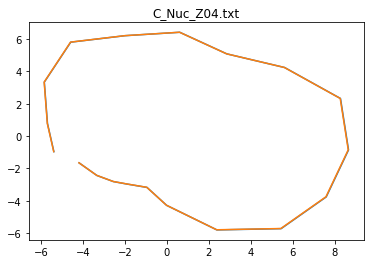

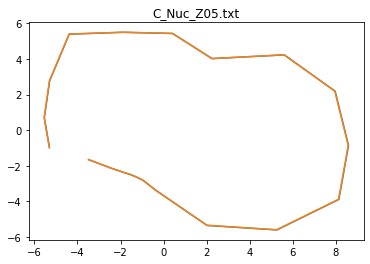

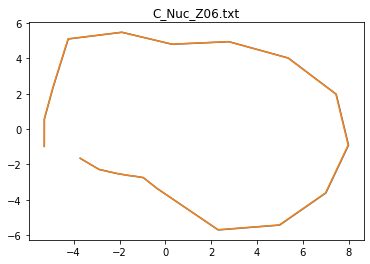

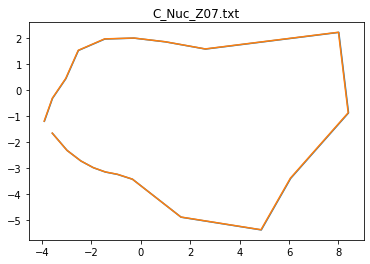

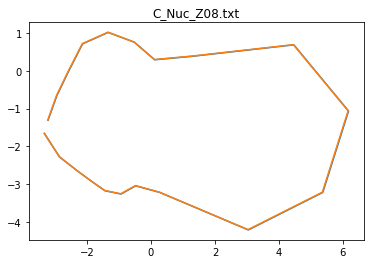

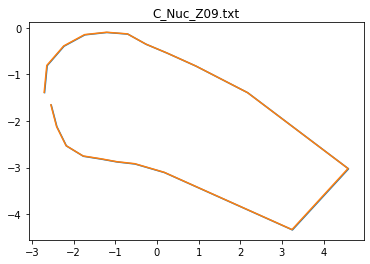

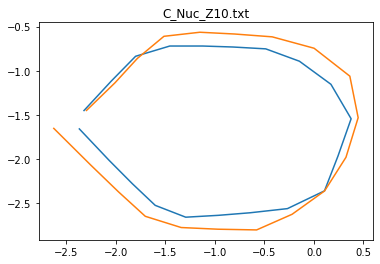

In [223]:
for f1, f2 in zip(files1,files2):
    p1 = fetch_pts(f1, dims=3)
    p2 = fetch_pts(f2, dims=3)
#     print(f1, f2)
#     print(p1-p2)
    plt.plot(p1.T[0], p1.T[1])
    plt.plot(p2.T[0], p2.T[1])
    plt.title(f1.split('/')[-1])
    plt.show()

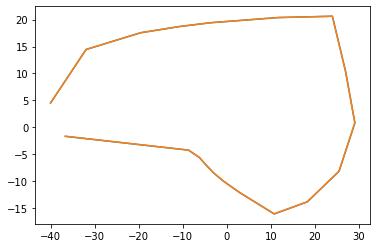

In [220]:
plt.plot(p1.T[0], p1.T[1])
plt.plot(p2.T[0], p2.T[1])

In [225]:
import sys
sys.path.append("/Users/asears/work/confocal/datasets/scripts/general/")
import verify
from importlib import reload
reload(verify)

<module 'verify' from '/Users/asears/work/confocal/datasets/scripts/general/verify.py'>

In [234]:
d1 = '../export_contours/gtest_hgps_P00_%d/'
d2 = '../export_contours/contours_20210601/hgps/contours_hgps_P00_%d_redo/'
name = 'hgps1_%d'

20 ../export_contours/gtest_hgps_P00_1/C_Cyto_Z01.txt
20 ../export_contours/contours_20210601/hgps/contours_hgps_P00_1_redo/C_Cyto_Z01.txt
20 ../export_contours/gtest_hgps_P00_2/C_Cyto_Z01.txt
20 ../export_contours/contours_20210601/hgps/contours_hgps_P00_2_redo/C_Cyto_Z01.txt
20 ../export_contours/gtest_hgps_P00_4/C_Cyto_Z01.txt
20 ../export_contours/contours_20210601/hgps/contours_hgps_P00_4_redo/C_Cyto_Z01.txt
20 ../export_contours/gtest_hgps_P00_5/C_Cyto_Z01.txt
20 ../export_contours/contours_20210601/hgps/contours_hgps_P00_5_redo/C_Cyto_Z01.txt
20 ../export_contours/gtest_hgps_P00_6/C_Cyto_Z01.txt
20 ../export_contours/contours_20210601/hgps/contours_hgps_P00_6_redo/C_Cyto_Z01.txt
20 ../export_contours/gtest_hgps_P00_7/C_Cyto_Z01.txt
20 ../export_contours/contours_20210601/hgps/contours_hgps_P00_7_redo/C_Cyto_Z01.txt
20 ../export_contours/gtest_hgps_P00_8/C_Cyto_Z01.txt
20 ../export_contours/contours_20210601/hgps/contours_hgps_P00_8_redo/C_Cyto_Z01.txt


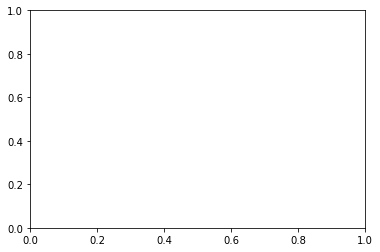

In [236]:
for cell in [1,2,4,5,6,7,8]:
    verify.verify(d1 % cell, d2 % cell, name % cell, threshold=1)

In [240]:
for celln in [1,]:
    fnames = list(sorted(glob.glob(os.path.join('../export_contours/test360_hgps_P00_%d/' % celln, '*Z*.txt'))))
    print(len(fnames), fnames[0])

20 ../export_contours/test360_hgps_P00_1/C_Cyto_Z01.txt


[[-20.933  -0.987]
 [-17.979  -4.146]
 [-12.683  -5.557]
 [-10.677  -7.07 ]
 [ -8.744  -8.2  ]
 [ -6.971  -9.117]
 [ -5.323  -9.96 ]
 [ -3.696 -10.791]
 [ -1.984 -11.666]
 [ -0.059 -12.644]
 [  3.195 -18.374]
 [  6.685 -18.706]
 [ 10.611 -18.677]
 [ 13.581 -16.504]
 [ 15.074 -13.015]
 [ 15.808  -9.511]
 [ 17.142  -6.565]
 [ 18.72   -3.518]
 [ 20.524  -0.051]
 [ 22.867   4.245]
 [ 22.908   8.804]
 [ 19.314  11.763]
 [ 16.009  14.317]
 [ 14.659  19.099]
 [ 12.135  23.917]
 [  7.114  24.224]
 [  2.774  27.1  ]
 [ -2.254  27.695]
 [ -7.73   28.734]
 [-13.044  27.4  ]
 [-17.382  24.038]
 [-23.1    22.252]
 [-24.155  15.97 ]
 [-24.868  10.609]
 [-23.311   5.235]
 [-21.557   0.871]]
../export_contours/test360_hgps_P00_1/C_Cyto_Z01.txt


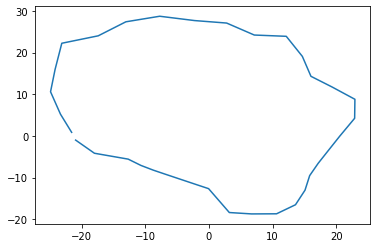

In [244]:
data = fetch_pts(fnames[0]); print(data)
plt.plot(data.T[0], data.T[1]); print(fnames[0])

[-20.524337    -7.41248672]


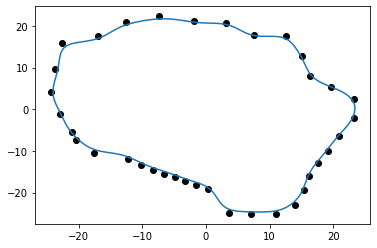

(4.298499078145745,
 array([[2.07262291e+01, 6.78470366e-01, 6.81235532e-01, 1.09853772e+00,
         2.14034611e-01, 2.89174489e-01, 3.06611050e-01, 1.73593952e-01,
         1.01954687e-01, 1.23649433e-01, 1.57938073e-01, 1.39763420e-01,
         8.53993258e-02, 6.93514659e-02, 4.77922930e-02, 5.78052479e-02,
         4.50545126e-02, 5.45493238e-02, 2.72058939e-02, 1.65898104e-02],
        [2.32008908e+01, 1.56383786e+00, 1.49494312e+00, 2.29560176e-01,
         5.07489064e-01, 6.32571905e-01, 3.70898006e-01, 1.98170707e-01,
         2.12399933e-01, 3.04468225e-01, 6.46887427e-02, 9.84822871e-02,
         4.53520659e-02, 6.70195526e-02, 6.50954586e-02, 8.70091831e-02,
         5.38255736e-02, 3.48875569e-02, 2.78561121e-02, 2.45489065e-02]]))

In [250]:
efc_ratio(data, order=20, doPlot=True)

In [260]:
partial_fnames = {}

fnames = list(sorted(glob.glob(os.path.join('../export_contours/', 'test360_hgps_P00*/*Nuc*.txt'))))
print('hgps', len(fnames))
partial_fnames = fnames

hgps 70


In [261]:
fnames

['../export_contours/test360_hgps_P00_1/C_Nuc_Z01.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z02.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z03.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z04.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z05.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z06.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z07.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z08.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z09.txt',
 '../export_contours/test360_hgps_P00_1/C_Nuc_Z10.txt',
 '../export_contours/test360_hgps_P00_2/C_Nuc_Z01.txt',
 '../export_contours/test360_hgps_P00_2/C_Nuc_Z02.txt',
 '../export_contours/test360_hgps_P00_2/C_Nuc_Z03.txt',
 '../export_contours/test360_hgps_P00_2/C_Nuc_Z04.txt',
 '../export_contours/test360_hgps_P00_2/C_Nuc_Z05.txt',
 '../export_contours/test360_hgps_P00_2/C_Nuc_Z06.txt',
 '../export_contours/test360_hgps_P00_2/C_Nuc_Z07.txt',
 '../export_contours/test360_hgps_P00_2/C_Nuc_Z0

In [270]:
data1 = fetch_pts(fnames[0]); print(fnames[0])
data2 = fetch_pts(fnames[5]); print(fnames[1])


../export_contours/test360_hgps_P00_1/C_Nuc_Z01.txt
../export_contours/test360_hgps_P00_1/C_Nuc_Z02.txt


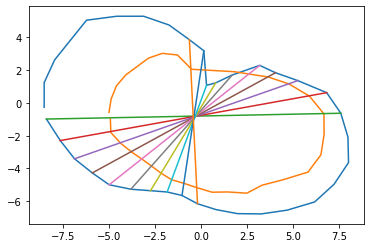

In [277]:
plt.plot(data1.T[0], data1.T[1])
plt.plot(data2.T[0], data2.T[1])
for s in range(10):
    plt.plot([data1.T[0][s],data1.T[0][s+offset]], [data1.T[1][s],data1.T[1][s+offset]])

In [278]:
# ok! 36 points allows us to do what we need. Now make the lateral EFCR values and finish up.

# Example lateral curve

In [282]:
ldata = np.array([fetch_pts(f, dims=3) for f in fnames[:10]]); print(ldata.shape)

(10, 36, 3)


(2, 20)


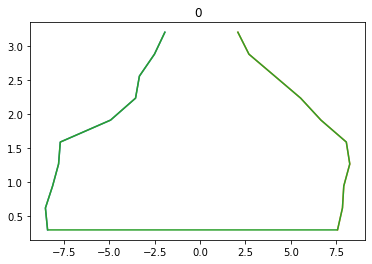

(2, 20)


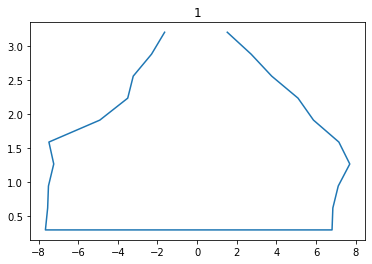

(2, 20)


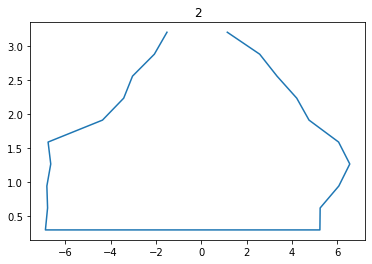

(2, 20)


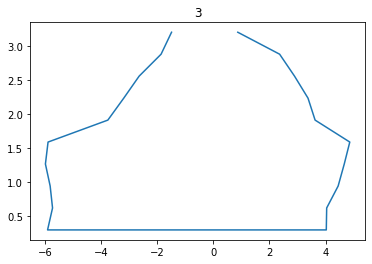

(2, 20)


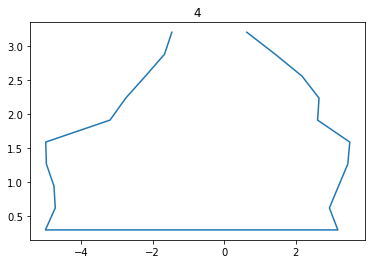

(2, 20)


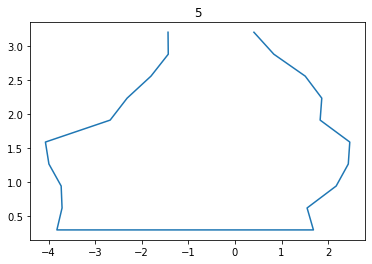

(2, 20)


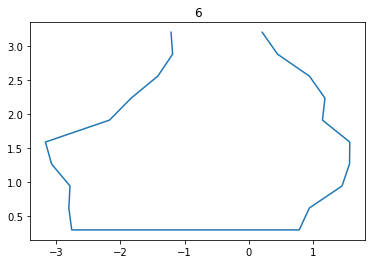

(2, 20)


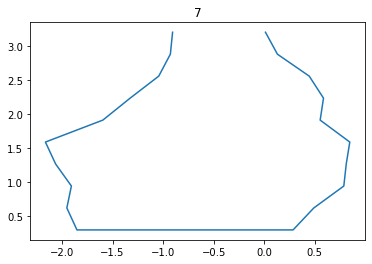

(2, 20)


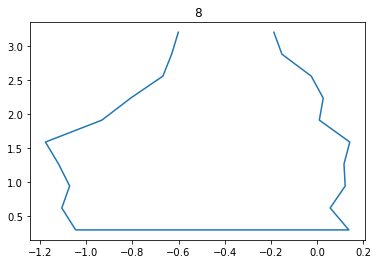

(2, 20)


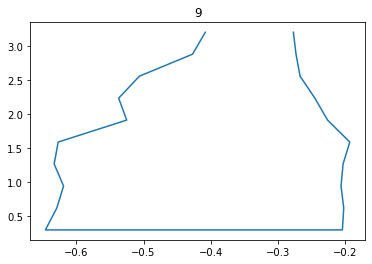

(2, 20)


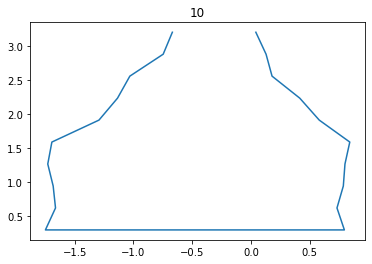

(2, 20)


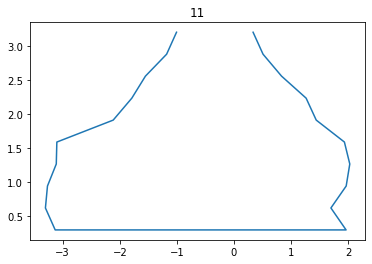

(2, 20)


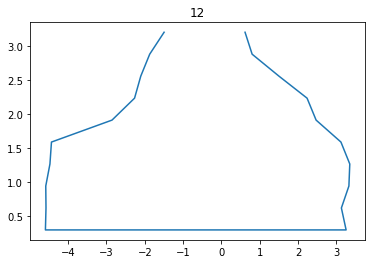

(2, 20)


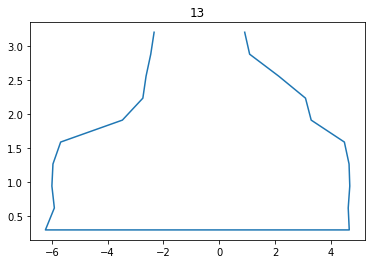

(2, 20)


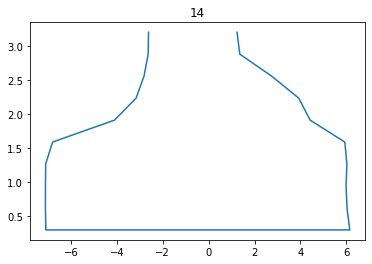

(2, 20)


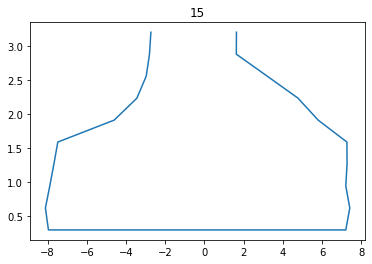

(2, 20)


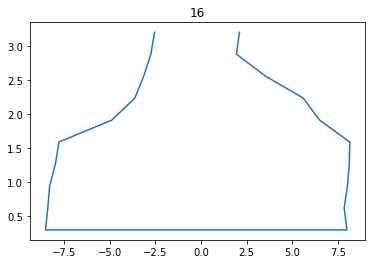

(2, 20)


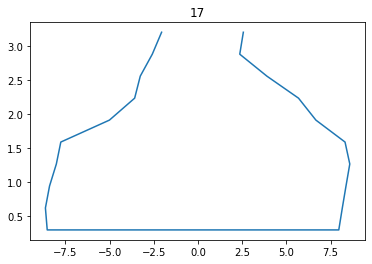

(2, 20)


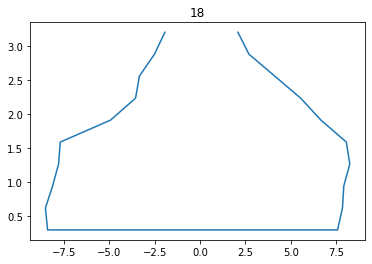

(2, 20)


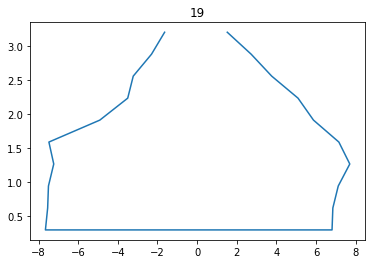

(2, 20)


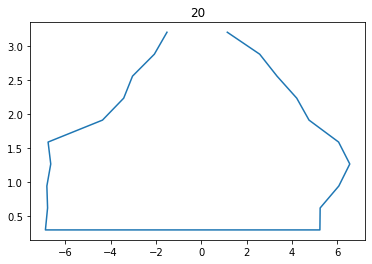

(2, 20)


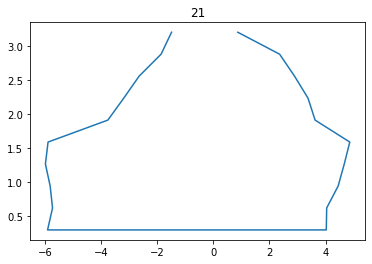

(2, 20)


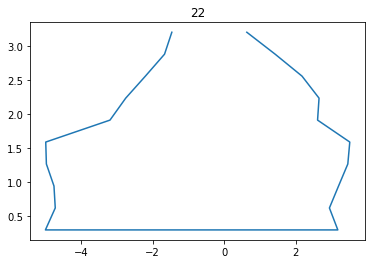

(2, 20)


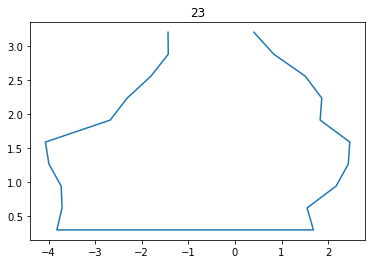

(2, 20)


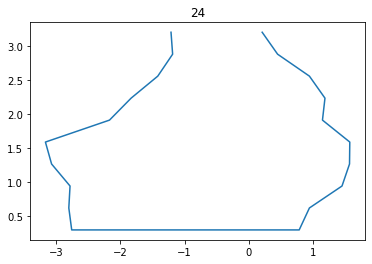

(2, 20)


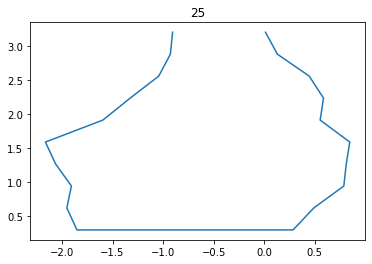

(2, 20)


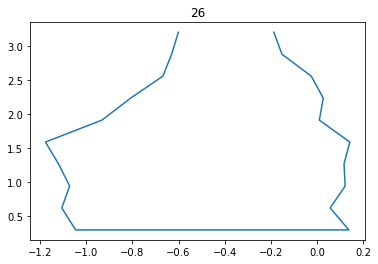

(2, 20)


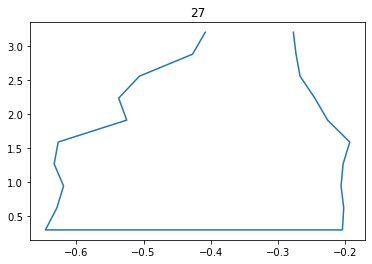

(2, 20)


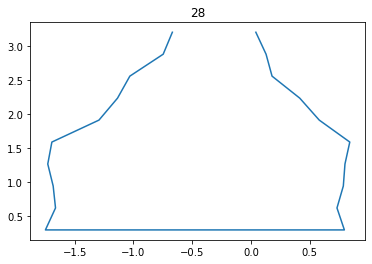

(2, 20)


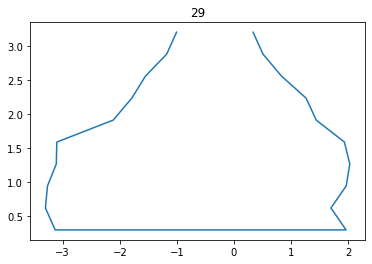

(2, 20)


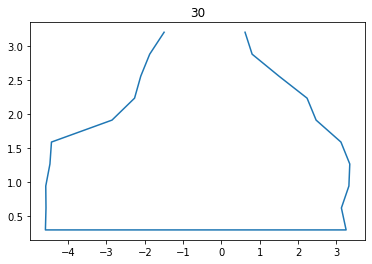

(2, 20)


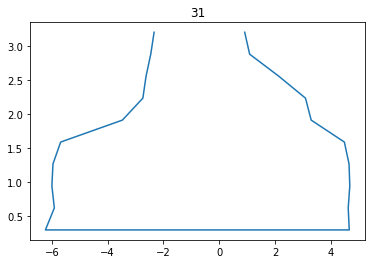

(2, 20)


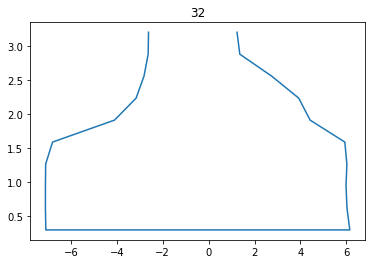

(2, 20)


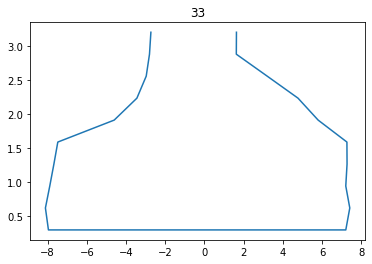

(2, 20)


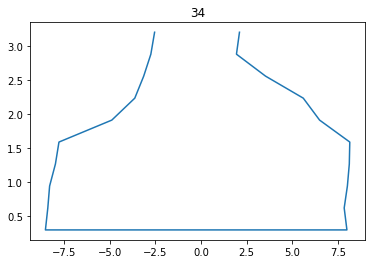

(2, 20)


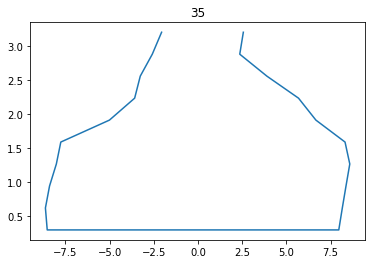

IndexError: index 36 is out of bounds for axis 1 with size 36

In [305]:
plt.plot(ldata[:,0,0],ldata[:,0,2])
plt.plot(ldata[:,0-18,0],ldata[:,0-18,2])

for s in range(37):
    both_sides = np.array([np.hstack([ldata[::-1,s,0],ldata[:,s-18,0]]),
                          np.hstack([ldata[::-1,s,2],ldata[:,s-18,2]])]); print(both_sides.shape)
    plt.plot(both_sides[0], both_sides[1])
    plt.title(s)
    plt.show()

In [ ]:
# fit EFC to a slice

[-2.03183287  2.09002419]


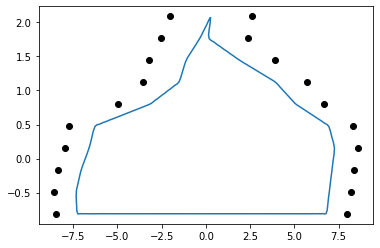

In [309]:
res = efc_ratio(both_sides.T, order=100, doPlot=True)

In [ ]:
# ok, so, of course we can't do EFC, because there are flat regions. We could probably capture the ratio of
# convex area to non-convex though? This  wouldn't be exact. 

# Serious redo

In [312]:
lines = ['parent', 'hgps', 'rs', 'huvec']

In [341]:
for line in lines:
    dirs = list(sorted(glob.glob(f'../export_contours/lateral_{line}_P00_*/')))
    files = list(sorted(glob.glob(os.path.join(dirs[0],'C_N*Z*.txt')))); print(len(files))
    print(len(dirs),files[0])
    
    all_line = []
    for celldir in dirs:
#         print(celldir)
        cellfiles = list(sorted(glob.glob(os.path.join(celldir,'C_N*Z*.txt'))));
        
        contours_nuc = np.array([fetch_pts(f, dims=2) for f in cellfiles])
        efcr_set = [efc_ratio(c, order=15, doPlot=False) for c in contours_nuc]
        efcr_scalars = np.mean([round(_[0],2) for _ in efcr_set][:-3])
        all_line.append(efcr_scalars)
        print(celldir, efcr_scalars)
    print(line, np.mean(all_line))

10
7 ../export_contours/lateral_parent_P00_1/C_Nuc_Z01.txt
../export_contours/lateral_parent_P00_1/ 3.931428571428572
../export_contours/lateral_parent_P00_2/ 5.938571428571429
../export_contours/lateral_parent_P00_3/ 3.075714285714286
../export_contours/lateral_parent_P00_4/ 4.925714285714286
../export_contours/lateral_parent_P00_5/ 7.39
../export_contours/lateral_parent_P00_6/ 4.984285714285714
../export_contours/lateral_parent_P00_7/ 3.0557142857142856
parent 4.757346938775511
10
7 ../export_contours/lateral_hgps_P00_1/C_Nuc_Z01.txt
../export_contours/lateral_hgps_P00_1/ 5.234285714285714
../export_contours/lateral_hgps_P00_2/ 3.0628571428571427
../export_contours/lateral_hgps_P00_4/ 5.858571428571429
../export_contours/lateral_hgps_P00_5/ 4.710000000000001
../export_contours/lateral_hgps_P00_6/ 3.345714285714286
../export_contours/lateral_hgps_P00_7/ 4.0685714285714285
../export_contours/lateral_hgps_P00_8/ 5.008571428571429
hgps 4.469795918367347
10
5 ../export_contours/lateral_rs

In [332]:
np.array(contours_nuc).shape

(10, 36, 2)

# Solidity, Circularity, FormFactor

In [343]:
# Solidity: calculate area and convex area

In [349]:
import cv2 as cv
contours_nuc.shape

(10, 36, 2)

In [367]:
for cnt in contours_nuc:
    cnt = np.array([cnt]).transpose([1,0,2]) # .T
    area = cv.contourArea(cnt)
    hull = cv.convexHull(cnt)
    hull_area = cv.contourArea(hull)
    solidity = float(area)/hull_area
    print('Solidity:')

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/shapedescr.cpp:272: error: (-215:Assertion failed) npoints >= 0 && (depth == 5 || depth == 4) in function 'contourArea'


In [357]:
contour = np.array([[[0,0]], [[10,0]], [[10,10]], [[5,4]]]) #make a fake array
print(cv2.contourArea(contour)) #also compatible with function


45.0


In [361]:
np.array([[[0,0]], [[10,0]], [[10,10]], [[5,4]]]).shape

(4, 1, 2)

In [363]:
cnt.shape

(36, 1, 2)

In [366]:
cnt[:4].shape

(4, 1, 2)

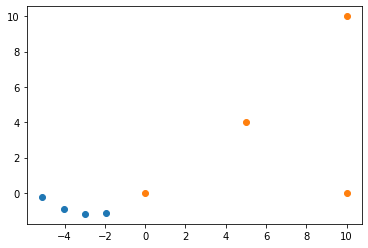

In [369]:
plt.scatter(cnt.T[0], cnt.T[1])
plt.scatter(contour.T[0], contour.T[1])

In [373]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-D
hull = ConvexHull(points); print(hull)


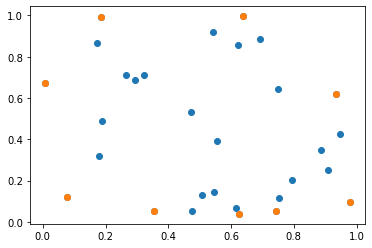

In [376]:
hpts = points[hull.vertices]
plt.scatter(points.T[0], points.T[1])
plt.scatter(hpts.T[0], hpts.T[1])

In [399]:
def get_hull(c):
    hull = ConvexHull(c)
    hullpts = c[hull.vertices]
#     print('perimeter:', hull.area, hull.volume)

    return hull, hullpts

In [392]:
r, rpts = get_hull(contours_nuc[0]); print(rpts.shape)

perimeter: 38.55264487839044 101.104574
(24, 2)


In [396]:
def get_perimeter(c):
    p = 0
    for a,b in zip(c,c[1:]):
        p+= np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
        
    p += np.sqrt((c[0][0]-c[-1][0])**2+(c[0][1]-c[-1][1])**2) # closure
    return p
        

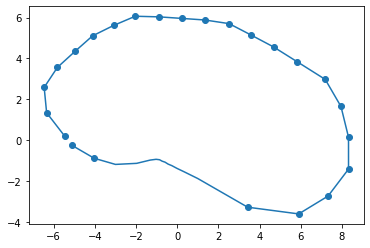

In [384]:
plt.plot(contours_nuc[0].T[0], contours_nuc[0].T[1])
plt.scatter(r.T[0], r.T[1])

In [385]:
def polyArea2D(pts):
    lines = np.hstack([pts,np.roll(pts,-1,axis=0)])
    area = 0.5*abs(sum(x1*y2-x2*y1 for x1,y1,x2,y2 in lines))
    return area

In [387]:
polyArea2D(contours_nuc[0]), polyArea2D(r)

(97.84634949999999, 101.104574)

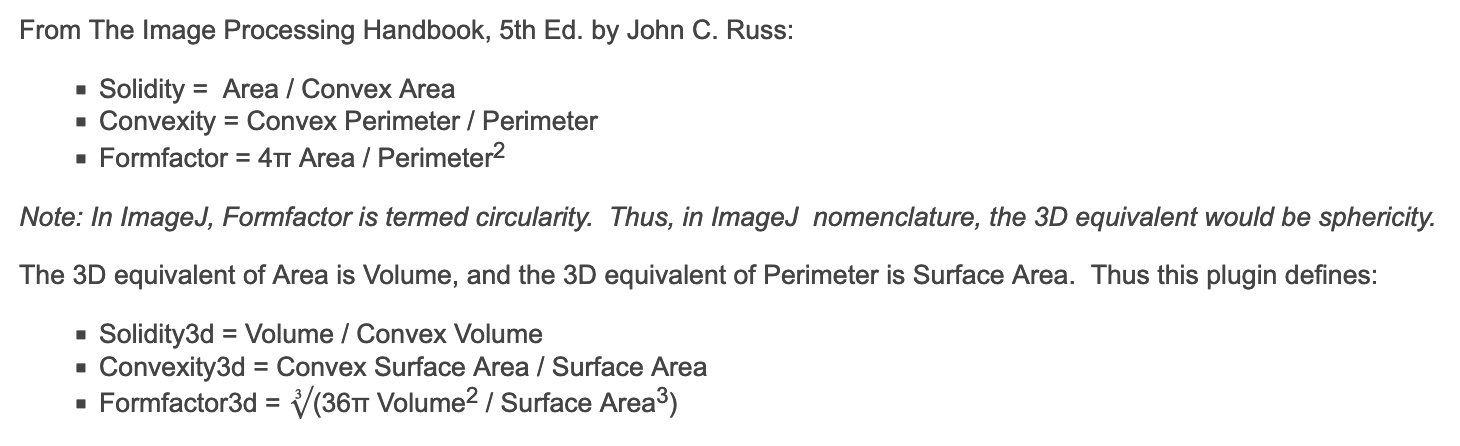

In [466]:
def get_metrics(c, order=15):
    _, hull = get_hull(c)
    
    area = polyArea2D(c)
    area_convex = polyArea2D(hull)
    
    perim = get_perimeter(c)
    perim_convex = get_perimeter(hull)
    
    solidity = area / area_convex
    convexity = perim_convex / perim
    formfactor = 3.14159*4*area/perim**2 # aka circularity
    
    efcr = efc_ratio(c, order=order, doPlot=False, return_axes=False)
    
    return solidity, convexity, formfactor, efcr
    
for c in contours_nuc:
    print(get_metrics(c))
    

(0.8556920485887011, 0.9672188671436548, 0.6293078532371706, 3.280935690877721)
(0.8572400803842789, 0.9414859073134572, 0.5662769380276463, 2.7256648591230914)
(0.8954895328012541, 0.9685407337369921, 0.6153742286159313, 2.9747199869253187)
(0.8612983508950036, 0.9702224265756931, 0.6274198636402393, 3.281344591521719)
(0.8586551190825206, 0.9652083921306298, 0.6189688716241833, 3.22417157939506)
(0.8644346283477208, 0.9620659259781085, 0.5962913111442907, 2.9347148014178734)
(0.8509244696108802, 0.9643133328746107, 0.6056426100001384, 2.984290140896801)
(0.870884678867689, 0.9623173513548947, 0.6065322928275917, 2.912148921482008)
(0.8756275265624845, 0.9664133406072362, 0.620139710127715, 2.980924023602939)
(0.9193450022175119, 0.998035227214195, 0.38272369161080755, 3.300125044101595)


In [402]:
contours_nuc.shape

(10, 36, 2)

In [ ]:
def lateral_metrics(cs, midpoint=18):
    for c in range(cs.shape[1]):
        combined = plt.plot(ldata[:,0,0],ldata[:,0,2])
plt.plot(ldata[:,0-18,0],ldata[:,0-18,2])
        

In [438]:
for line in lines:
    dirs = list(sorted(glob.glob(f'../export_contours/lateral_{line}_P00_*/')))
    files = list(sorted(glob.glob(os.path.join(dirs[0],'C_N*Z*.txt')))); print(len(files))
    print(len(dirs),files[0])
    
    all_line = []
    for celldir in dirs:
#         print(celldir)
        cellfiles = list(sorted(glob.glob(os.path.join(celldir,'C_N*Z*.txt'))));
        
        contours_nuc = np.array([fetch_pts(f, dims=3) for f in cellfiles])
        
        all_cell = []
        for n in range(contours_nuc.shape[1]):
            combined = combine_halves(contours_nuc,n) 
            latmetrics = get_metrics(combined)
            all_cell.append(latmetrics)
#             print(celldir, latmetrics)
        all_line.append(all_cell)
    all_line = np.array(all_line)
#     print(line, np.mean(np.mean(all_line,1),0))
    print(line, [round(_,3) for _ in [np.mean(all_line[:,:,0]),np.mean(all_line[:,:,1]),np.mean(all_line[:,:,2])]])

10
7 ../export_contours/lateral_parent_P00_1/C_Nuc_Z01.txt
parent [0.981, 0.98, 0.508]
10
7 ../export_contours/lateral_hgps_P00_1/C_Nuc_Z01.txt
hgps [0.932, 0.959, 0.578]
10
5 ../export_contours/lateral_rs_P00_2/C_Nuc_Z01.txt
rs [0.974, 0.991, 0.67]
10
7 ../export_contours/lateral_huvec_P00_1/C_Nuc_Z01.txt
huvec [0.947, 0.979, 0.52]


(7, 36, 3)


In [423]:
def combine_halves(c, n, midpoint=18, reduce=True):
    a = c[:,n,:]
    b = np.array(list(reversed(c[:,n-18, :])))
    res = np.vstack([a,b])
    if reduce:
        res = res[:,[0,2]]
    return res

res = combine_halves(contours_nuc, 0); print(res)


[[-9.248  0.3  ]
 [-8.751  0.511]
 [-8.89   0.722]
 [-9.234  0.933]
 [-8.949  1.144]
 [-8.801  1.356]
 [-8.572  1.567]
 [-8.109  1.778]
 [-6.097  1.989]
 [-3.039  2.2  ]
 [ 2.503  2.2  ]
 [ 3.929  1.989]
 [ 5.749  1.778]
 [ 7.332  1.567]
 [ 8.202  1.356]
 [ 8.554  1.144]
 [ 8.482  0.933]
 [ 8.528  0.722]
 [ 8.149  0.511]
 [ 7.917  0.3  ]]


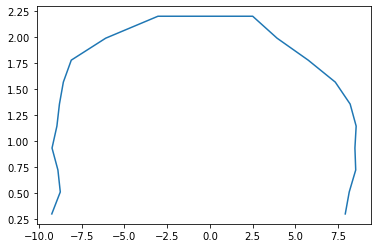

In [424]:
plt.plot(res.T[0], res.T[1])

In [439]:
all_line.shape

(7, 36, 3)

# Axial

In [487]:
def summarize_metrics(path, lines, n=0):
    line_data = [np.load(os.path.join(path, f'{line}.npy')) for line in lines]
#     print('summ shape:', line_data[0].shape)

    with open(os.path.join(path, f'summary_{n}.txt'),'w') as fout:
        for k,line in enumerate(lines):
            temp = np.mean(line_data[k],1)
#             print('temp.shape', temp.shape)
            fout.write(f'{line}\t'+'\t'.join([str(round(t,4)) for t in temp[:,n]])+'\n')
        # print(','.join([str(np.mean(line_data[_],1)[n],4) for _ in range(len(line_data))]))
        
def get_first_efcr(path, lines, n=3, targetn=4):
    line_data = [np.load(os.path.join(path, f'{line}.npy')) for line in lines]
#     print('summ shape:', line_data[0].shape)

    with open(os.path.join(path, f'summary_{targetn}.txt'),'w') as fout:
        for k,line in enumerate(lines):
            print('line_data[k].shape', line_data[k].shape) # 7, 10, 4
            temp = line_data[k][:,0,:] # take the first contour's metrics, instead of a mean over levels
#             print('temp.shape', temp.shape)
            fout.write(f'{line}\t'+'\t'.join([str(round(t,4)) for t in temp[:,n]])+'\n')
        # print(','.join([str(np.mean(line_data[_],1)[n],4) for _ in range(len(line_data))]))



In [488]:
# Load contours
# calculate features for each contour, axially

EXPORT_AXIAL = '/Users/asears/work/confocal/axial_features/'
os.makedirs(EXPORT_AXIAL,exist_ok=True)

with open(os.path.join(EXPORT_AXIAL,'axial_summary.txt'),'w') as fout:
    fout.write('# Axial features' + '\n')


for line in lines:
    dirs = list(sorted(glob.glob(f'../export_contours/lateral_{line}_P00_*/')))
    files = list(sorted(glob.glob(os.path.join(dirs[0],'C_N*Z*.txt')))); print(len(files))
    print(len(dirs),files[0])
    
    all_line = []
    for celldir in dirs:
#         print(celldir)
        cellfiles = list(sorted(glob.glob(os.path.join(celldir,'C_N*Z*.txt'))));
        
        contours_nuc = np.array([fetch_pts(f, dims=2) for f in cellfiles])
        m = np.array([get_metrics(c) for c in contours_nuc])
        all_line.append(m)
        print(celldir, np.shape(m))
        
    with open(os.path.join(EXPORT_AXIAL,'axial_summary.txt'),'a') as fout:
#             to_write = [round(_,4) for _ in [np.mean(all_line[:,:,0]),np.mean(all_line[:,:,1]),np.mean(all_line[:,:,2])]]
#             print(line, to_write)

        fout.write('# ' + line + '\n')

        meaned_cell = np.mean(all_line,1)
#         print('meaned_cell_shape', meaned_cell.shape)

        for cell in meaned_cell:
            fout.write(','.join([str(round(_,4)) for _ in cell]) + '\n')
        fout.write('\n\n')

        np.save(os.path.join(EXPORT_AXIAL,f'{line}.npy'),all_line)

            # print(np.mean(meaned_cell,0), np.std(meaned_cell,0))
            # fout.write(','.join([str(round(_,4)) for _ in np.mean(meaned_cell,0)]))
#         all_line = np.array(all_line)
#         print(line, all_line.shape)
#         np.save(os.path.join(EXPORT_AXIAL,f'{line}.npy'), all_line)

summarize_metrics(EXPORT_AXIAL, lines, 0)
summarize_metrics(EXPORT_AXIAL, lines, 1)
summarize_metrics(EXPORT_AXIAL, lines, 2)
summarize_metrics(EXPORT_AXIAL, lines, 3)
get_first_efcr(EXPORT_AXIAL, lines, 3, targetn=4)

10
7 ../export_contours/lateral_parent_P00_1/C_Nuc_Z01.txt
../export_contours/lateral_parent_P00_1/ (10, 4)
../export_contours/lateral_parent_P00_2/ (10, 4)
../export_contours/lateral_parent_P00_3/ (10, 4)
../export_contours/lateral_parent_P00_4/ (10, 4)
../export_contours/lateral_parent_P00_5/ (10, 4)
../export_contours/lateral_parent_P00_6/ (10, 4)
../export_contours/lateral_parent_P00_7/ (10, 4)
10
7 ../export_contours/lateral_hgps_P00_1/C_Nuc_Z01.txt
../export_contours/lateral_hgps_P00_1/ (10, 4)
../export_contours/lateral_hgps_P00_2/ (10, 4)
../export_contours/lateral_hgps_P00_4/ (10, 4)
../export_contours/lateral_hgps_P00_5/ (10, 4)
../export_contours/lateral_hgps_P00_6/ (10, 4)
../export_contours/lateral_hgps_P00_7/ (10, 4)
../export_contours/lateral_hgps_P00_8/ (10, 4)
10
5 ../export_contours/lateral_rs_P00_2/C_Nuc_Z01.txt
../export_contours/lateral_rs_P00_2/ (10, 4)
../export_contours/lateral_rs_P00_3/ (10, 4)
../export_contours/lateral_rs_P00_5/ (10, 4)
../export_contours/lat

In [471]:
data = np.load(os.path.join(EXPORT_AXIAL,'hgps.npy'))

In [473]:
data.shape

(7, 10, 3)